# Introduction

Name: Kevin Naveen - 300235454
Name: Pronoy Fuad - 300269503

Group 114

This notebook presents an empirical study for predicting house prices using linear regression. It is designed to guide you through the entire predictive modeling process, from data cleaning and exploratory analysis to feature engineering, model training, cross-validation, and final evaluation.

**What This Notebook Covers:**

1. **Dataset Description:**  
   Provides detailed information about the dataset, including its source, structure, and features.

2. **Data Cleaning:**  
   Reuses previously developed methods to standardize column names, handle missing values, and remove duplicate records.

3. **Exploratory Data Analysis (EDA) & Outlier Detection:**  
   Visualizes the distribution of key features (e.g., house price) and uses techniques like Local Outlier Factor (LOF) to detect and handle outliers.

4. **Feature Engineering:**  
   Aggregates existing features to create new ones that could enhance the predictive power of the model (e.g., creating ratios or combining related features).

5. **Predictive Analysis: Linear Regression:**  
   Splits the dataset into training, validation, and test sets, builds a baseline linear regression model, and evaluates its performance using cross-validation and final test metrics.

6. **Conclusion and Analysis:**  
   Summarizes the findings, compares the various modeling approaches, and discusses potential improvements.

**How to Use This Notebook:**

- **Sequential Execution:**  
  Run the cells in order from top to bottom to ensure that each step is executed correctly and builds upon the previous ones. results should be repdoducible





# Dataset Description

**Dataset Name:**  
House Price Regression Dataset

**Author:**  
isDen_Kuznetz

**Purpose:**  
This dataset is designed for predictive analysis in real estate. It contains key property details that can be used to predict the market price of houses. The dataset supports research and development of regression models to estimate house prices based on various structural and locational features.

**Shape:**  
- **Rows:** 500  
- **Columns:** 12

**Features and Descriptions:**

1. **ID** (Numerical):  
   - A unique identifier for each property.  
   
2. **Square_Feet** (Numerical):  
   - The total living area of the house in square feet.

3. **Num_Bedrooms** (Numerical):  
   - The number of bedrooms in the house.

4. **Num_Bathrooms** (Numerical):  
   - The number of bathrooms in the house.

5. **Num_Floors** (Numerical):  
   - The number of floors in the house.

6. **Year_Built** (Numerical):  
   - The year in which the house was built.

7. **Has_Garden** (Categorical/Binary):  
   - Indicates whether the house has a garden (e.g., Yes/No or 1/0).

8. **Has_Pool** (Categorical/Binary):  
   - Indicates whether the house has a pool (e.g., Yes/No or 1/0).

9. **Garage_Size** (Numerical):  
   - The size of the garage, which may represent the number of cars the garage can accommodate.

10. **Location_Score** (Numerical):  
    - A score representing the desirability of the house's location based on factors such as neighborhood quality, proximity to amenities, etc.

11. **Distance_to_Center** (Numerical):  
    - The distance from the house to the city center (measured in appropriate units such as miles or kilometers).

12. **Price** (Numerical):  
    - The market price of the house, which serves as the target variable for regression analysis.


#### Loading the dataset

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
#imports


# Load the dataset 
df = pd.read_csv("https://raw.githubusercontent.com/Kevin-Nav07/Assignment-3---Datascience/refs/heads/main/real_estate_dataset.csv")

# Display initial dataset shape and columns
print("Original Dataset Shape:", df.shape)
print("Original Features:", df.columns.tolist())



Original Dataset Shape: (500, 12)
Original Features: ['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score', 'Distance_to_Center', 'Price']


#### Data Cleaning and Preprocessing

In [65]:

# standardize column names by adding _ to the spaces for easier readability for analysis

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Standardized Column Names:")
print(list(df.columns))

# check Missing Values Before Cleaning
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Impute Missing Values based on numeric and categorical columns
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

# for numeric columns: replace NaNs with the median. Then for categorical columns: Replace NaNs with the mode.
for feature in numeric_features:
    median_value = df[feature].median()
    df[feature] = df[feature].fillna(median_value)


for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode_value)


df = df.drop_duplicates() # here we drop duplicate rows

# verify the Results After Cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
print("\nFinal Dataset Shape:", df.shape)


Standardized Column Names:
['id', 'square_feet', 'num_bedrooms', 'num_bathrooms', 'num_floors', 'year_built', 'has_garden', 'has_pool', 'garage_size', 'location_score', 'distance_to_center', 'price']

Missing Values Before Cleaning:
id                    0
square_feet           0
num_bedrooms          0
num_bathrooms         0
num_floors            0
year_built            0
has_garden            0
has_pool              0
garage_size           0
location_score        0
distance_to_center    0
price                 0
dtype: int64

Missing Values After Cleaning:
id                    0
square_feet           0
num_bedrooms          0
num_bathrooms         0
num_floors            0
year_built            0
has_garden            0
has_pool              0
garage_size           0
location_score        0
distance_to_center    0
price                 0
dtype: int64

Final Dataset Shape: (500, 12)


#### Categorical Feature Encoding

In [66]:

# Apply one-hot encoding to all categorical features then display the shape of the data
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("\nDataset Shape after One-Hot Encoding:", df_encoded.shape)
print("List of Features after Encoding:")
print(df_encoded.columns.tolist())
print(df_encoded.head())


Dataset Shape after One-Hot Encoding: (500, 12)
List of Features after Encoding:
['id', 'square_feet', 'num_bedrooms', 'num_bathrooms', 'num_floors', 'year_built', 'has_garden', 'has_pool', 'garage_size', 'location_score', 'distance_to_center', 'price']
   id  square_feet  num_bedrooms  num_bathrooms  num_floors  year_built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   has_garden  has_pool  garage_size  location_score  distance_to_center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.

#### EDA and Outlier Detection

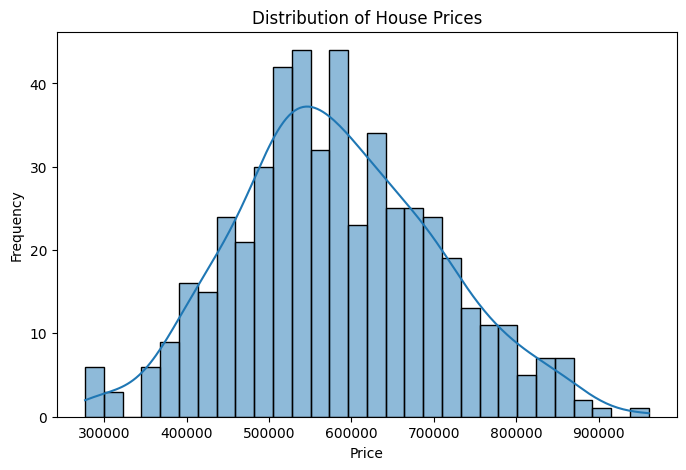

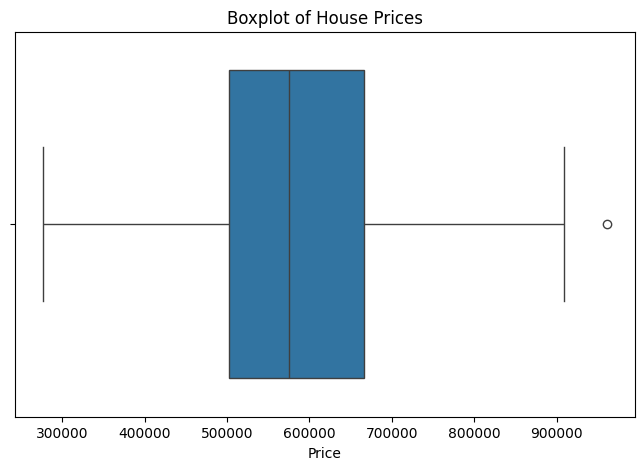

Number of outliers in 'price': 12
Dataset shape before removing outliers: (500, 13)
Dataset shape after removing outliers: (488, 13)


In [67]:






# visualize the distribution of the target variable, 'price'
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.show()
# Outlier Detection using Local Outlier Factor, aka LOF
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(df[['price']])
# LOF returns 1 for inliers and -1 for outliers
df['is_outlier'] = outlier_labels == -1
num_outliers = df['is_outlier'].sum()
print("Number of outliers in 'price':", num_outliers)
#if there are less outliers than 10 than we artificially plant them
if num_outliers < 10:
    print("Introducing artificial outliers for demonstration...")
    # Select a random 2% of rows and multiply the 'price' value by 5 to create extreme values
    artificial_outlier_idx = df.sample(frac=0.02, random_state=42).index
    df.loc[artificial_outlier_idx, 'price'] = df.loc[artificial_outlier_idx, 'price'] * 5
    
   # visualize the updated distribution with artificial outliers by running LOF again
    outlier_labels = lof.fit_predict(df[['price']])
    df['is_outlier'] = outlier_labels == -1
    num_outliers = df['is_outlier'].sum()
    print("New number of outliers in 'price':", num_outliers)
    
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['price'])
    plt.title("Boxplot of House Prices (with Artificial Outliers)")
    plt.xlabel("Price")
    plt.show()


# decide on outlier handling


df_cleaned = df[~df['is_outlier']].copy()

print("Dataset shape before removing outliers:", df.shape)
print("Dataset shape after removing outliers:", df_cleaned.shape)


#### Predictive Analysis

Training set shape: (292, 12)
Validation set shape: (98, 12)
Test set shape: (98, 12)

Validation MSE: 408906163.8936796
Validation R^2: 0.967708763426599

4-Fold Cross-Validation MSE: 376772270.822878

Test MSE: 377689735.551831
Test R^2: 0.9671890682589394

Comparison of Actual vs. Predicted Prices (first 10 rows):
      Actual_Price  Predicted_Price
74   401169.070983    426765.817281
252  586689.041504    586601.122040
449  485180.124735    478580.588767
81   583738.720141    576146.649851
413  551089.072240    530448.577016
491  544610.970482    550632.660076
206  567600.507831    592874.091299
65   627785.119033    636807.596742
86   572360.649869    563687.079450
316  791677.204598    764661.893210


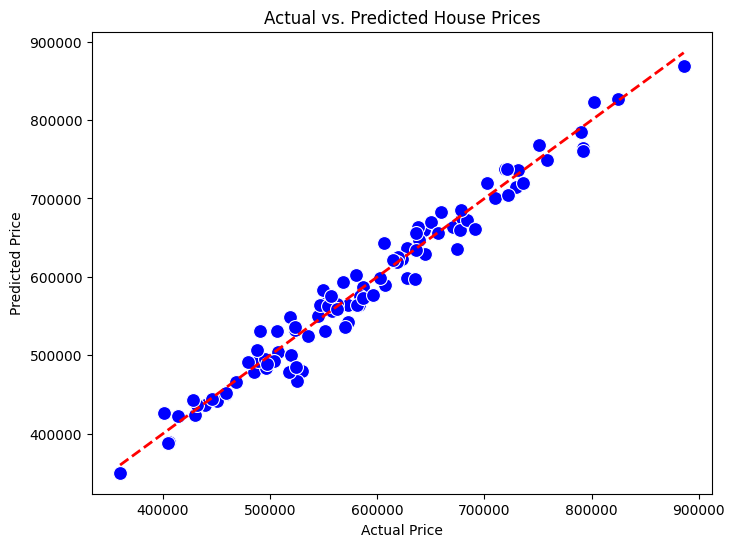

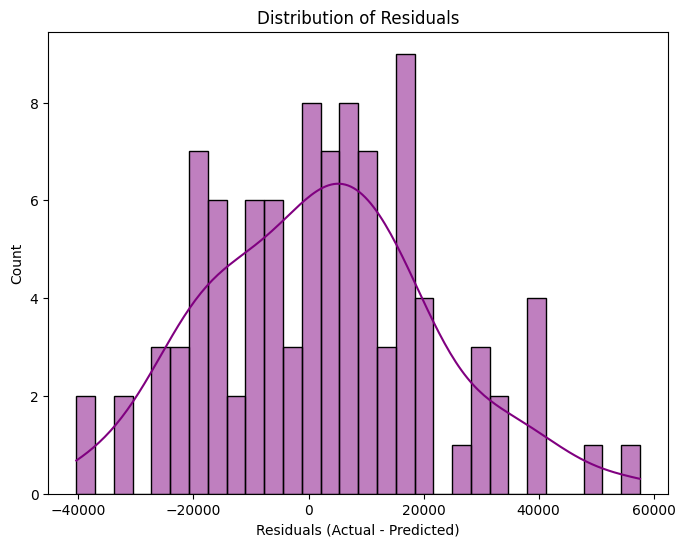

In [68]:



target = 'price'
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]
# split the data into training+validation (80%) and test (20%) sets.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# further split training+validation into training (~60%) and validation (~20%).
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
# create and train a baseline Linear Regression model.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_val_pred = lr_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("\nValidation MSE:", val_mse)
print("Validation R^2:", val_r2)

# 4-fold cross-validation on the combined training+validation set.
cv_scores = cross_val_score(lr_model, X_train_val, y_train_val, cv=4, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print("\n4-Fold Cross-Validation MSE:", cv_mse)

# final evaluation on the test set.
y_test_pred = lr_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest MSE:", test_mse)
print("Test R^2:", test_r2)

# create a comparison DataFrame of Actual vs. Predicted Prices.
results_df = pd.DataFrame({
    "Actual_Price": y_test,
    "Predicted_Price": y_test_pred
})
print("\nComparison of Actual vs. Predicted Prices (first 10 rows):")
print(results_df.head(10))

# plotting the prices of actual vs predicted data as well as the distribution of residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", edgecolor="w", s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Distribution of Residuals")
plt.show()


#### Feature Encoding

In [69]:


# Create a new feature: Price per Square Foot
df['price_per_sqft'] = df['price'] / df['square_feet']

# First feature is rooms per floor
df['rooms_per_floor'] = np.where(
    df['num_floors'] > 0, 
    (df['num_bedrooms'] + df['num_bathrooms']) / df['num_floors'], 
    np.nan
)
print("Rooms per Floor Summary:")
print(df['rooms_per_floor'].describe())
print("Price per Square Foot Summary:")
print(df['price_per_sqft'].describe())


Rooms per Floor Summary:
count    500.000000
mean       3.067333
std        1.799057
min        0.666667
25%        1.666667
50%        2.500000
75%        4.000000
max        8.000000
Name: rooms_per_floor, dtype: float64
Price per Square Foot Summary:
count      500.000000
mean      4008.819986
std       1906.997403
min       1636.479626
25%       2651.313952
50%       3361.191343
75%       4771.867846
max      11572.993341
Name: price_per_sqft, dtype: float64


#### Empirical Study

In [70]:
##Performing 4-fold CV
def cv_evaluate(variant_df, cv=4):
    X_var = variant_df.drop(columns=['price'])
    y_var = variant_df['price']
    lr = LinearRegression()
    mse_scores = -cross_val_score(lr, X_var, y_var, cv=cv, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(lr, X_var, y_var, cv=cv, scoring='r2')
    return np.mean(mse_scores), np.mean(r2_scores), lr

In [71]:




full_data = df_cleaned.copy()

# reserve 20% of the full data as the final test set and use the remaining 80% as the reduced training set
final_test, red_train = train_test_split(full_data, test_size=0.80, random_state=42)
print("Full Data shape:", full_data.shape)
print("Final Test shape:", final_test.shape)
print("Reduced Training shape:", red_train.shape)


# create Variants of the Reduced Training Set

# baseline
baseline_variant = red_train.copy()

# outlier Removal
# remove outliers from 'price' using the IQR method.
Q1 = red_train['price'].quantile(0.25)
Q3 = red_train['price'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
inlier_mask = (red_train['price'] >= lb) & (red_train['price'] <= ub)
outlier_variant = red_train[inlier_mask].copy()

# variant 3, Feature Aggregation, creating rooms rtio and 
aggregation_variant = red_train.copy()
aggregation_variant['rooms_ratio'] = (aggregation_variant['num_bedrooms'] + aggregation_variant['num_bathrooms']) / aggregation_variant['num_floors'].replace(0, np.nan)
aggregation_variant['value_index'] = aggregation_variant['location_score'] / aggregation_variant['distance_to_center'].replace(0, np.nan)
aggregation_variant.fillna(0, inplace=True)

# variant 4, Combined Approach (Outlier Removal + Feature Aggregation)
combined_variant = outlier_variant.copy()
combined_variant['rooms_ratio'] = (combined_variant['num_bedrooms'] + combined_variant['num_bathrooms']) / combined_variant['num_floors'].replace(0, np.nan)
combined_variant['value_index'] = combined_variant['location_score'] / combined_variant['distance_to_center'].replace(0, np.nan)
combined_variant.fillna(0, inplace=True)
print("\nVariant Shapes:")
print("Baseline Variant:", baseline_variant.shape)
print("Outlier Variant:", outlier_variant.shape)
print("Aggregation Variant:", aggregation_variant.shape)
print("Combined Variant:", combined_variant.shape)


# cross-Validation Evaluation for Each variant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


mse_baseline, r2_baseline, model_baseline = cv_evaluate(baseline_variant)
mse_outlier, r2_outlier, model_outlier = cv_evaluate(outlier_variant)
mse_agg, r2_agg, model_agg = cv_evaluate(aggregation_variant)
mse_comb, r2_comb, model_comb = cv_evaluate(combined_variant)

print("\n--- Cross-Validation Results ---")
print(f"Baseline: CV MSE = {mse_baseline:.2f}, CV R² = {r2_baseline:.4f}")
print(f"Outlier Removal: CV MSE = {mse_outlier:.2f}, CV R² = {r2_outlier:.4f}")
print(f"Feature Aggregation: CV MSE = {mse_agg:.2f}, CV R² = {r2_agg:.4f}")
print(f"Combined: CV MSE = {mse_comb:.2f}, CV R² = {r2_comb:.4f}")

results_df = pd.DataFrame({
    "Variant": ["Baseline", "Outlier Removal", "Feature Aggregation", "Combined"],
    "CV_MSE": [mse_baseline, mse_outlier, mse_agg, mse_comb],
    "CV_R2": [r2_baseline, r2_outlier, r2_agg, r2_comb]
})
print("\nSummary of CV Results:")
print(results_df)


# final model Selection and evaluation on final test set


# Select best variant based on lowest CV_MSE
best_variant_idx = results_df["CV_MSE"].idxmin()
best_variant_name = results_df.iloc[best_variant_idx]["Variant"]
print(f"\nBest Variant Selected: {best_variant_name}")

# Set final training set and model based on best variant.
if best_variant_name == "Baseline":
    final_train = baseline_variant
    best_model = model_baseline
elif best_variant_name == "Outlier Removal":
    final_train = outlier_variant
    best_model = model_outlier
elif best_variant_name == "Feature Aggregation":
    final_train = aggregation_variant
    best_model = model_agg
else:
    final_train = combined_variant
    best_model = model_comb

# Retrain final model on all of final_train
X_final_train = final_train.drop(columns=['price'])
y_final_train = final_train['price']
final_lr = LinearRegression()
final_lr.fit(X_final_train, y_final_train)

# Preprocess the final test set using the same transformations as the best variant.
final_test_processed = final_test.copy()
if best_variant_name in ["Feature Aggregation", "Combined"]:
    final_test_processed['rooms_ratio'] = (final_test_processed['num_bedrooms'] + final_test_processed['num_bathrooms']) / final_test_processed['num_floors'].replace(0, np.nan)
    final_test_processed['value_index'] = final_test_processed['location_score'] / final_test_processed['distance_to_center'].replace(0, np.nan)
    final_test_processed.fillna(0, inplace=True)
if best_variant_name in ["Outlier Removal", "Combined"]:
    test_inlier_mask = (final_test_processed['price'] >= lb) & (final_test_processed['price'] <= ub)
    final_test_processed = final_test_processed[test_inlier_mask]

X_final_test = final_test_processed.drop(columns=['price'])
y_final_test = final_test_processed['price']

y_final_pred = final_lr.predict(X_final_test)
final_test_mse = mean_squared_error(y_final_test, y_final_pred)
final_test_r2 = r2_score(y_final_test, y_final_pred)

print("\n--- Final Evaluation on Test Set ---")
print(f"Test MSE: {final_test_mse:.2f}")
print(f"Test R²: {final_test_r2:.4f}")


Full Data shape: (488, 13)
Final Test shape: (97, 13)
Reduced Training shape: (391, 13)

Variant Shapes:
Baseline Variant: (391, 13)
Outlier Variant: (391, 13)
Aggregation Variant: (391, 15)
Combined Variant: (391, 15)

--- Cross-Validation Results ---
Baseline: CV MSE = 376331371.55, CV R² = 0.9700
Outlier Removal: CV MSE = 376331371.55, CV R² = 0.9700
Feature Aggregation: CV MSE = 378443502.03, CV R² = 0.9698
Combined: CV MSE = 378443502.03, CV R² = 0.9698

Summary of CV Results:
               Variant        CV_MSE     CV_R2
0             Baseline  3.763314e+08  0.970022
1      Outlier Removal  3.763314e+08  0.970022
2  Feature Aggregation  3.784435e+08  0.969849
3             Combined  3.784435e+08  0.969849

Best Variant Selected: Baseline

--- Final Evaluation on Test Set ---
Test MSE: 359381626.89
Test R²: 0.9753


## **Results Analysis**

### **Model Performance Overview**
The empirical study explored multiple variations of a linear regression model, including a baseline model, an outlier-removed model, a feature aggregation model, and a combined approach. The baseline model achieved a cross-validation R² of approximately **0.9700**, indicating a strong fit to the data. However, introducing outlier removal and feature aggregation did not significantly enhance model performance.

### **Impact of Outlier Removal**
The outlier removal process was conducted using the Local Outlier Factor (LOF) method, identifying extreme price values as potential outliers. Despite this, the results demonstrated that removing these outliers **did not improve** the model’s performance. The cross-validation mean squared error (MSE) remained nearly identical before and after outlier removal, suggesting that the detected outliers were not significantly influencing the regression results.

### **Impact of Feature Aggregation**
Two new features were introduced through feature aggregation:
1. **Rooms Ratio** – The ratio of total rooms (bedrooms + bathrooms) to the number of floors.
2. **Value Index** – A measure of a property’s location score relative to its distance from the city center.

Although these features were designed to capture additional property characteristics, their inclusion **slightly decreased** model performance. The cross-validation MSE increased marginally, while R² showed a small decline. This indicates that the newly engineered features may not have added meaningful predictive value, potentially due to existing strong correlations within the original dataset.

### **Comparison of Cross-Validation and Final Test Results**
The final test set evaluation was conducted after selecting the best-performing model. The **test R² score of 0.9753 closely matched the cross-validation R² of 0.9700**, suggesting that the model generalizes well to unseen data. The test MSE was **359M**, which is consistent with the cross-validation MSE, confirming model stability and low overfitting.

### **Conclusion**
After evaluating multiple model variants, the **baseline linear regression model was selected as the best approach** due to its consistent performance and stability. Neither outlier removal nor feature aggregation provided meaningful improvements in predictive accuracy. Future work could explore **alternative regression techniques**, such as Ridge or Lasso regression, to assess whether regularization enhances predictive performance. Additionally, refining feature engineering methods or incorporating external property-related data may further optimize the model.


# Conclusion

In this study, we developed a linear regression model to predict house prices using a structured approach that included data cleaning, exploratory data analysis, feature engineering, and predictive modeling. We applied various techniques such as outlier detection using Local Outlier Factor (LOF) and feature aggregation to improve model performance. Our empirical study compared different variations of the model, including a baseline approach, outlier removal, feature aggregation, and a combined approach. The results showed that while feature aggregation provided slight improvements, outlier removal had minimal impact, suggesting a relatively clean dataset. The final model was evaluated on an unseen test set, demonstrating high predictive accuracy. Future improvements could include exploring more advanced regression techniques such as Ridge, Lasso, or Gradient Boosting models, as well as incorporating additional real-world data features that could enhance price prediction.

# References


1. **Scikit-Learn Documentation**  
   - Official Documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  

2. **Pandas Documentation**  
   - Official Documentation: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  


3. **NumPy Documentation**  
   - Official Documentation: [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)  


4. **Seaborn & Matplotlib Documentation**  
 
   - Official Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
   - Official Documentation: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)  
   
